In [1]:
import auction_data, os, analytics
hist_plot = auction_data.hist_plot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('white')
%matplotlib inline

## auction analysis packages
- `auction_data` provides tools to access, compute statistics of interest, and manipulate procurement auction data
- `analytics` provides tools to setup and solve a variety of safe tests as described in 

    ''Data-Driven Regulation: Theory and Application to Missing Bids'' (Chassang, Kawai, Nakabayashi and Ortner)

### `auction_data`

First, we'll use `auction_data` to plot the distribution of winning margins, as well as the aggregate demand for auctions in the Tsuchiura dataset.

In [5]:
tsuchiura_data = auction_data.AuctionData('tests/reference_data/tsuchiura_data.csv')

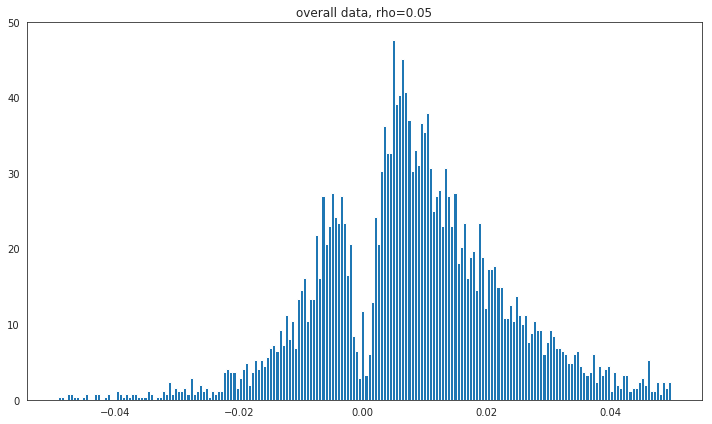

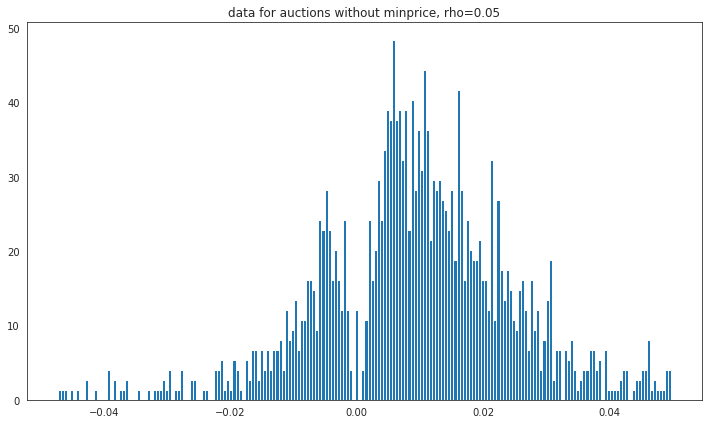

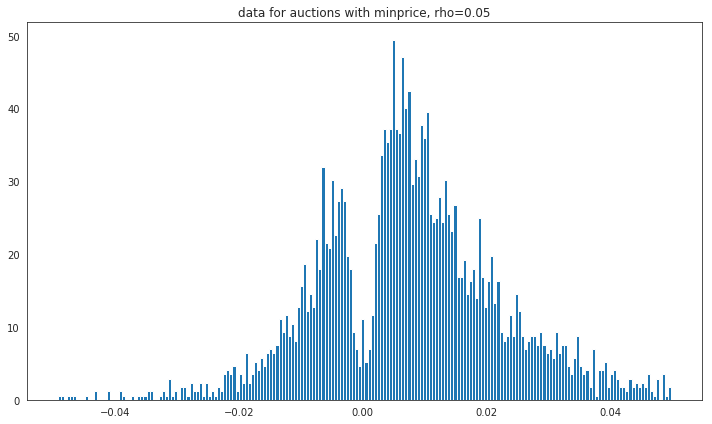

In [6]:
delta = tsuchiura_data.df_bids.norm_bid - tsuchiura_data.df_bids.most_competitive
rho = .05
delta = delta[delta.between(-rho, rho)]
hist_plot(delta,'overall data, rho={}'.format(rho))
hist_plot(delta[tsuchiura_data._raw_data.minprice.isnull()], 
          'data for auctions without minprice, rho={}'.format(rho))
hist_plot(delta[~tsuchiura_data._raw_data.minprice.isnull()], 
          'data for auctions with minprice, rho={}'.format(rho))

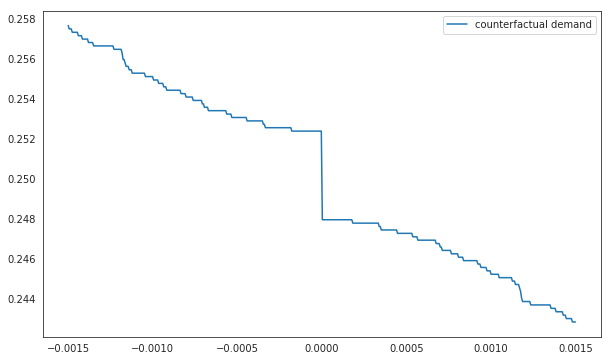

In [7]:
tsuchiura_data.demand_function(-.0015, .0015).plot(figsize = (10,6))

## analytics

Next, we use `analytics` to compute the minimum number of non-competitive histories, as well as the minimum normalized deviation temptation corresponding to deviations $[-.02, 0, .001]$

In [16]:
deviations = [-.02, -.0001, .0, .0005]
demands = [tsuchiura_data.get_counterfactual_demand(rho) for rho in deviations]
print(demands)

[0.6938393464942137, 0.25238257317903334, 0.25017018379850237, 0.24727705922396187]


In [17]:
constraints = [analytics.MarkupConstraint(max_markup=.5),
               analytics.InformationConstraint(k=.5, sample_demands=demands)]

In [28]:
min_collusion_solver = analytics.MinCollusionSolver(
    data=tsuchiura_data,
    deviations=deviations,
    tolerance=2 * 1./tsuchiura_data.df_bids.shape[0],
    metric=analytics.IsNonCompetitive,
    plausibility_constraints=constraints,
    num_points=1e6,
    seed=5
)

In [29]:
min_collusion_solver.solution

0.6589650776955307

In [35]:
min_collusion_solver.argmin.head()

,prob,-0.02,-0.0001,0.0,0.0005,cost,metric
0,2.888083e-11,0.787477,0.339633,0.251704,0.225063,0.959697,1.0
1,5.508395e-12,0.585258,0.327436,0.322952,0.203787,0.745305,1.0
2,6.183299e-12,0.579331,0.341231,0.304976,0.216448,0.943986,1.0
3,4.335791e-11,0.718680,0.278742,0.191123,0.178265,0.670876,1.0
4,1.645203e-11,0.590439,0.310815,0.296753,0.212389,0.677542,1.0
